In [1]:
import numpy as np 
from skimage import io
import matplotlib.pyplot as plt

n = 12
m = 4

x = np.array([1, 4, 7, 10])
color = np.array(["CDE6F5", "554640", "568259", "FE4A49"])
y = np.zeros([m,3], dtype=int)

for i in range(m):
    for j in range(3):
        y[i,j] = int(color[i][2*j], 16)*16 + int(color[i][2*j+1], 16)
print(y)

[[205 230 245]
 [ 85  70  64]
 [ 86 130  89]
 [254  74  73]]


[[255 255 255]
 [205 230 245]
 [154 131 147]
 [114  82  89]
 [ 85  70  64]
 [ 70  82  62]
 [ 69 106  73]
 [ 86 130  89]
 [121 141 100]
 [177 126  98]
 [254  74  73]
 [255   0  16]]


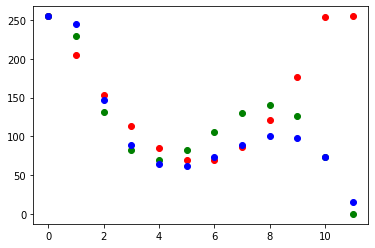

In [2]:
R = np.polyfit(x, y.T[0], m-1)
G = np.polyfit(x, y.T[1], m-1)
B = np.polyfit(x, y.T[2], m-1)

C = np.zeros([n,3])

for i in range(n):
    for j in range(m):
        C[i,0] += R[m-1-j]*i**j
        C[i,1] += G[m-1-j]*i**j
        C[i,2] += B[m-1-j]*i**j

for i in range(n):
    for j in range(3):
        if(C[i,j]<0):
            C[i,j]=0
        if(C[i,j]>255):
            C[i,j]=255

C = np.round(C).astype(int)

print(C)

plt.plot(range(n), C.T[0], 'ro')
plt.plot(range(n), C.T[1], 'go')
plt.plot(range(n), C.T[2], 'bo')
plt.show()

In [3]:
for i in range(n):
    print('%02x%02x%02x' % (C[i,0], C[i,1], C[i,2]))

ffffff
cde6f5
9a8393
725259
554640
46523e
456a49
568259
798d64
b17e62
fe4a49
ff0010


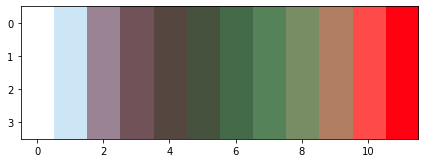

In [4]:
C = C.astype(np.uint8)

indices = np.zeros([4,n], dtype=int) + range(n)

io.imshow(C[indices])